WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 5

---

---
## 1. Motion Detector ##

So far we had considered visual processing mostly by linear filters that act on static inputs.
In motion processing we have to deal with dynamical stimuli and nonlinear computations.

The simplest implementation of a motion detector is by multiplying the time-shifted inputs at two
spatial locations with a fixed time delay.

$$
m(t) = f(x, t-\Delta t) \cdot f(x+\Delta x, t) - f(x, t) \cdot f(x+\Delta x, t-\Delta t)
$$

**a)**
To generate inputs for the motion detector,
write a function that takes as inputs a spatial wavelength $\lambda$, a (signed) velocity $v$,
number of spatial samples $Ns$ and number of time steps $Nt$,
and returns a $Ns$ x $Nt$ matrix with values corresponding
to a sinewave with period $\lambda$ that
moves with velocity $v$, i.e., gets shifted $v$ spatial sampling
intervals per time step. (Maybe you have done this already for execise 3) 

Generate a drifting sinewave with $\lambda=20$, and $v=2$, using $Ns=Nt=50$, and
calculate the output $m(t)$ of the motion detector described above with $\Delta x=2$, $\Delta t=2$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

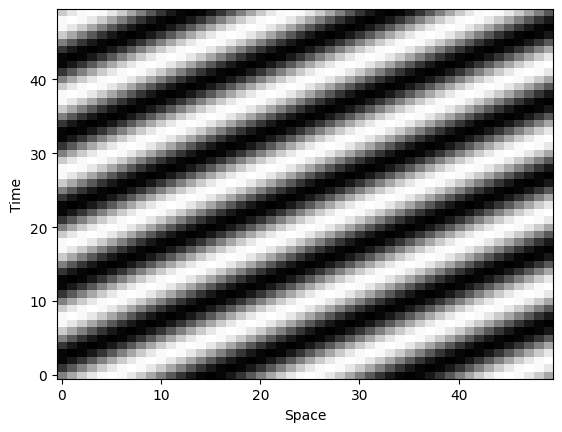

In [ ]:
def stimulus(lambda_x, v_x, N_x, N_t, dt):
    matrix = np.zeros((N_t, N_x))
    for t in range(N_t):
        for x in range(N_x):
            matrix[t, x] = np.sin(2 *np.pi * (x - v_x * t) / lambda_x)
    return matrix

plt.figure()
plt.imshow(stimulus(20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

**b)**
Repeat with twice as large values for $\lambda$, for $v$, and for both $\lambda$ and $v$.
How do the results differ?

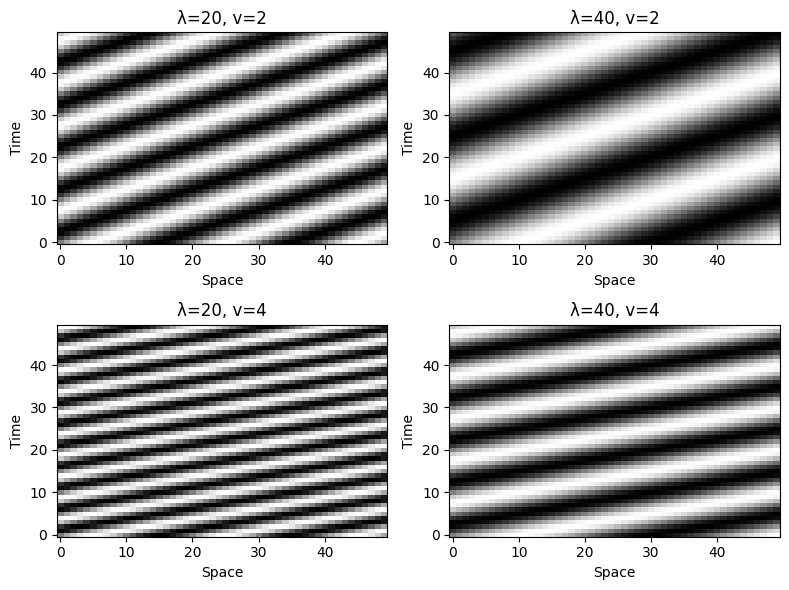

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()  # flatten 2x2 array to 1D list
params = [(20, 2), (40, 2), (20, 4), (40, 4)]

for i, ax in enumerate(axs):
    lambda_x, v_x = params[i]
    im = ax.imshow(stimulus(lambda_x, v_x, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
    ax.set_title(f'λ={lambda_x}, v={v_x}')
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')

plt.tight_layout()
plt.show()


**c)** Change the wavelength of the drifting sine continuously and plot the output of the motion detector. What do you observe and does it make sense? Repeat for different velocities.

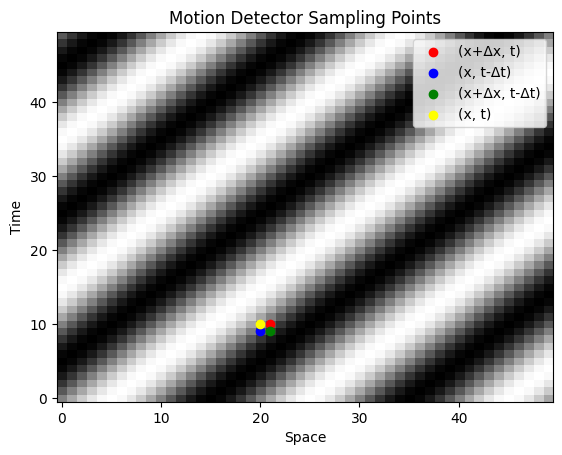

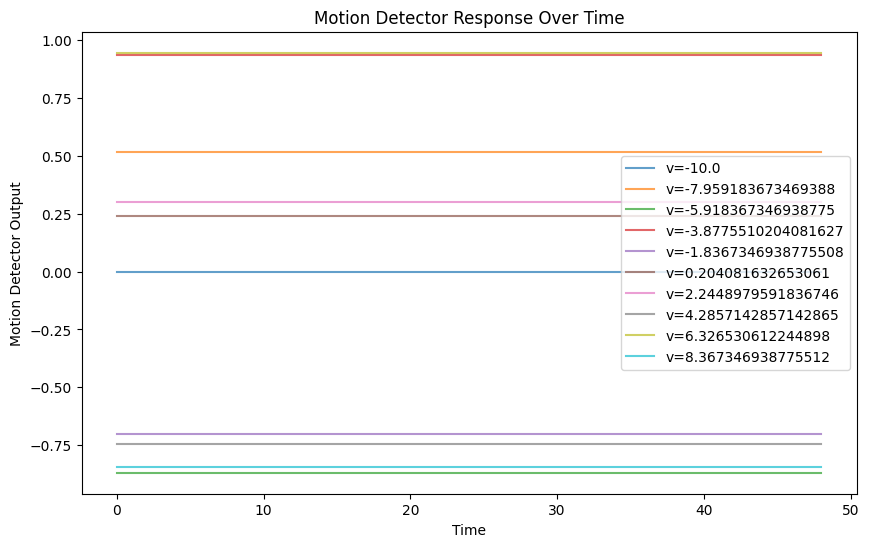

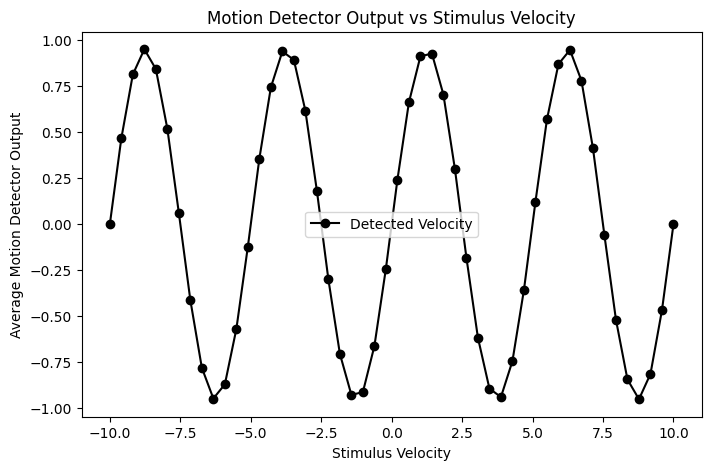

In [35]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]


velocities = np.linspace(-10, 10, 50)
velocity_detected = []

x = 20
del_x = 1
del_t = 1
t = 10

plt.figure()
plt.imshow(stimulus(20, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus(5, v, 50, 50, 0.1)

    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    if i % 5 == 0:
        plt.plot(motion_values, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity')
# plt.plot(velocities, np.abs(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()



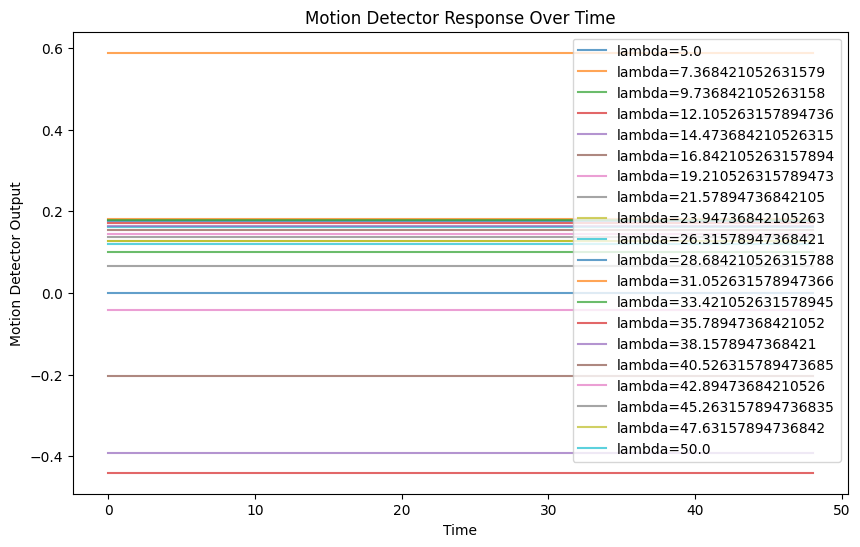

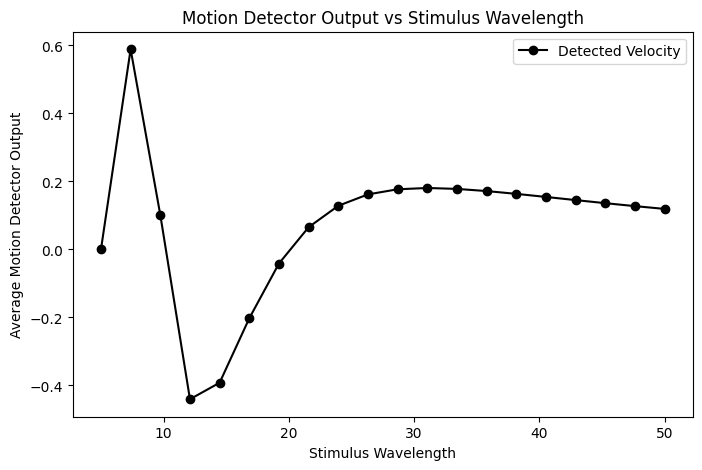

In [32]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]


lambdas = np.linspace(5, 50, 20)

velocity_detected = []

x = 20
del_x = 1
del_t = 1

plt.figure(figsize=(10, 6))
for lambda_x in lambdas:
    responses = []
    stimulus_matrix = stimulus(lambda_x, 10, 50, 50, 0.1)

    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    plt.plot(motion_values, label=f'lambda={lambda_x}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(lambdas, velocity_detected, marker='o', color='k', label='Detected Velocity')
# plt.plot(lambdas, np.abs(velocity_detected), marker='o', color = 'r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Wavelength')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Wavelength')
plt.legend()
plt.show()


**c)** Change the wavelength of the drifting sine continuously and plot the output of the motion detector. What do you observe and does it make sense? Repeat for different velocities.

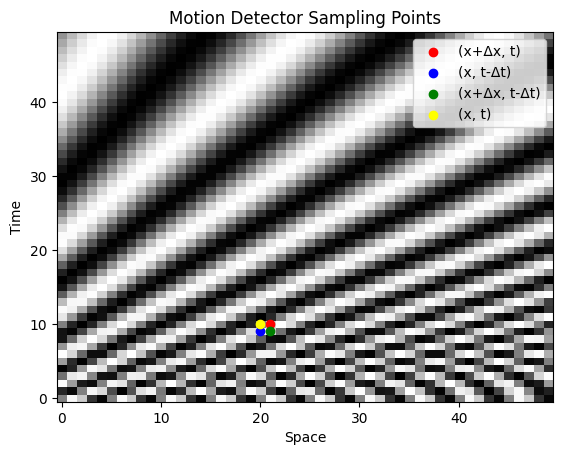

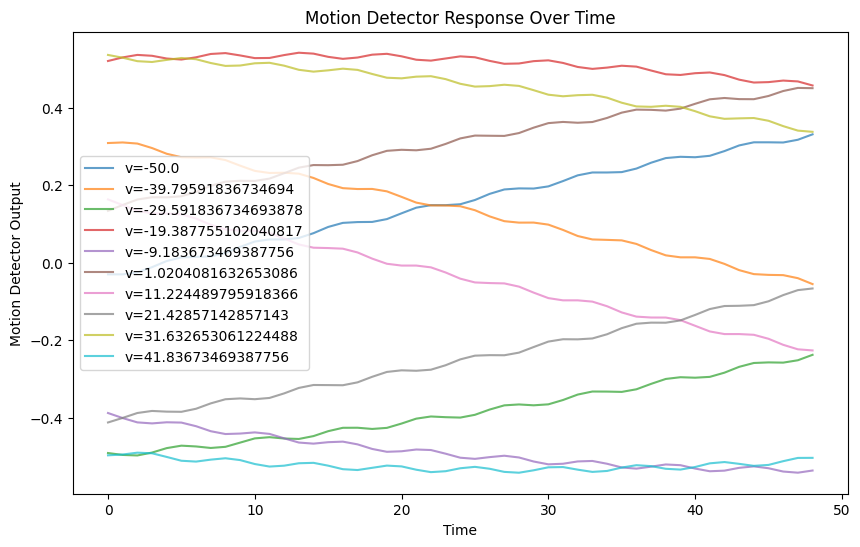

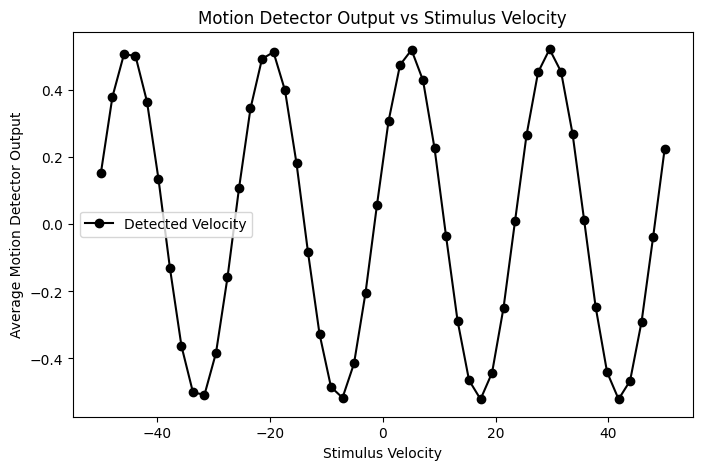

In [34]:
def stimulus_change(lambda_x_i, lambda_x_f, v_x, N_x, N_t, dt):
    matrix = np.zeros((N_t, N_x))
    for t in range(N_t):
        lambda_now = lambda_x_i + (lambda_x_f - lambda_x_i) * (t / N_t)
        for x in range(N_x):
            matrix[t, x] = np.sin(2 *np.pi * (x - v_x * t) / lambda_now)
    return matrix

# plt.figure()
# plt.imshow(stimulus_change(5, 20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
# plt.xlabel('Space')
# plt.ylabel('Time')
# plt.show()


velocities = np.linspace(-50, 50, 50)
velocity_detected = []

x = 20
del_x = 1
del_t = 1
t = 10

plt.figure()
plt.imshow(stimulus_change(5, 20, 2, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus_change(5, 20, v, 50, 50, 0.1)
    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    if i % 5 == 0:
        plt.plot(motion_values, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity')
# plt.plot(velocities, np.array(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()



**d)**
What is the problem with this simple motion detector?
How could you modify it to get a "better" motion detector?

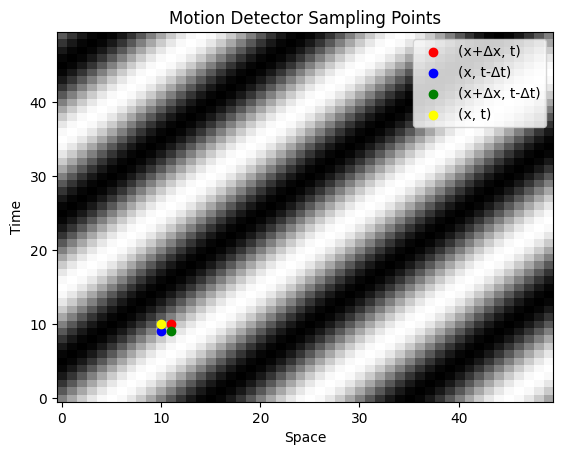

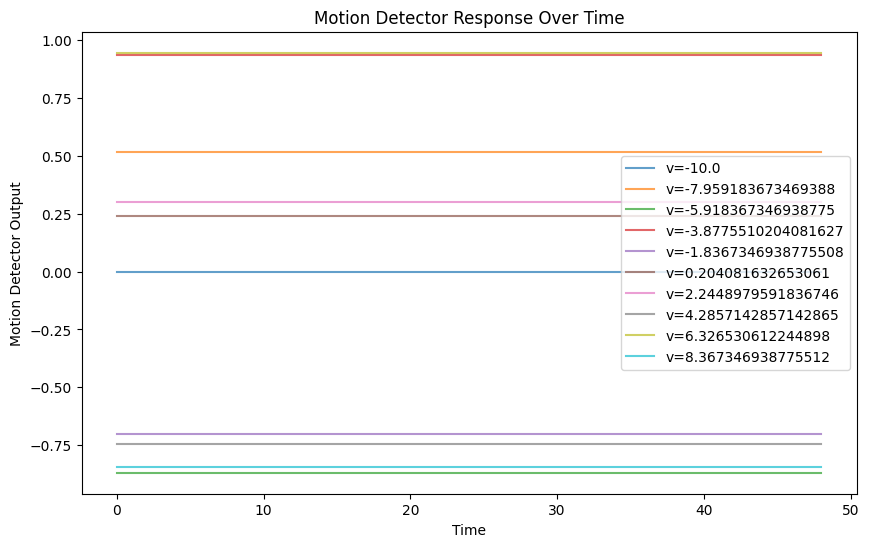

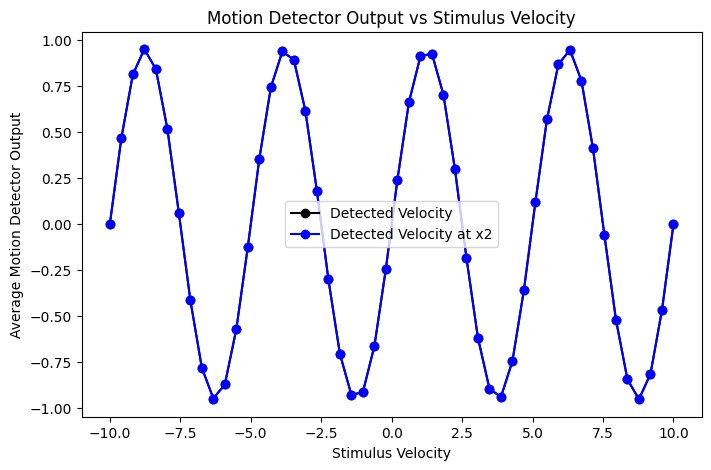

In [ ]:
def motion(t, stimulus_matrix, x, del_x, del_t):
    return stimulus_matrix[x, t - del_t]*stimulus_matrix[x + del_x, t] - stimulus_matrix[x, t]*stimulus_matrix[x + del_x, t - del_t]


velocities = np.linspace(-10, 10, 50)
velocity_detected = []
velocity_detected2 = []

x = 10
del_x = 1
del_t = 1
t = 10

plt.figure()
plt.imshow(stimulus(20, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure()
plt.imshow(stimulus(20, 1, 50, 50, 0.1), aspect='auto', cmap='gray', origin='lower')
plt.scatter(x + del_x, t, color='red', label='(x+Δx, t)')
plt.scatter(x, t - del_t, color='blue', label='(x, t-Δt)')
plt.scatter(x + del_x, t - del_t, color='green', label='(x+Δx, t-Δt)')
plt.scatter(x, t, color='yellow', label='(x, t)')
plt.legend()
plt.title('Motion Detector Sampling Points')
plt.xlabel('Space')
plt.ylabel('Time')
plt.show()

plt.figure(figsize=(10, 6))
for i, v in enumerate(velocities):
    responses = []
    stimulus_matrix = stimulus(5, v, 50, 50, 0.1)

    motion_values = [motion(t, stimulus_matrix, x, del_x, del_t) for t in range(1, 50)]
    motion_values2 = [motion(t, stimulus_matrix, x2, del_x, del_t) for t in range(1, 50)]
    velocity_detected.append(np.mean(motion_values))
    velocity_detected2.append(np.mean(motion_values2))
    if i % 5 == 0:
        plt.plot(motion_values, label=f'v={v}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Motion Detector Output')
plt.title('Motion Detector Response Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(velocities, velocity_detected, marker='o', color='k', label='Detected Velocity')
plt.plot(velocities, velocity_detected2, marker='o', color='b', label='Detected Velocity at x2')
# plt.plot(velocities, np.abs(velocity_detected), marker = 'o', color='r', label='Absolute Velocity Reference')
plt.xlabel('Stimulus Velocity')
plt.ylabel('Average Motion Detector Output')
plt.title('Motion Detector Output vs Stimulus Velocity')
plt.legend()
plt.show()

